<a href="https://colab.research.google.com/github/pkky/Projekty/blob/main/Aco_ag_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Noga Bartłomiej Inżynieria danych

# Projekt : Porównaj działanie ACO, AG oraz algorytmu pszczelego dla tych samych konfiguracji miast, zwiększając stopniowo 𝑛. 

# Pakiet pszczeli
# https://pypi.org/project/pybees/ 

## Algorytm mrówkowy (ACO)

In [1]:
# biblioteka numeryczna
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt

# pomar czasu
import time

# wyświetlanie importowanej grafiki
from IPython.display import display, Image



# działania na łańcuchach znaków
import string 

# statystyka
import statistics as st



In [2]:
# skumulowana suma tablicy
from itertools import accumulate

In [3]:
# odległość euklidesowa
def dist(i,j):
     return np.abs(cities[i,0]-cities[j,0]) + np.abs(cities[i,1]-cities[j,1])
    
  


In [4]:
# długość drogi
def len_path(path):
    return sum([dist(path[i],path[i+1]) for i in range(n)])

In [5]:
n=30 # liczba miast
cities=np.array([[random.random(),random.random()] for i in range(n)]) # lista współrzędnych miast



In [6]:
# tablica odległości między miastami
dis_tab=np.array([[dist(i,j) for i in range(n)] for j in range(n)])


In [7]:
# początkowa tablica feromonów - na razie wszędzie tyle samo!
fero=np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n)


In [8]:

def ind_prob(tab_p):
    cum_p=np.array(list(accumulate(tab_p))) # tablica prawdopodobieństw
    return np.sum(np.heaviside(random.random()-cum_p,0)).astype(int)# to jest numer wybranej drogi , konwersja do typu integer

In [9]:
# parametry modelu dot. prawdopodobieństwa wyboru drogi przez mrówkę

alpha = 1.15;
beta = 1;

h = 0.03; # szybkość uaktualniania śladów feromonowych
# po kolejnym etapie algorytmu feromony_nowe = (1-h) feromony_stare + h feromony_złożone

popsize = 10; # liczba mrówek "na trasie" w kolejnym etapie algorytmu

sc = n/popsize; # kontroluje, ile feromonu jest zostawiane = liczba miast/liczba mrówek

# odkładana przez mrówkę ilość feromonu to sc/długość odcinka

In [10]:
# Zwraca (losowo) miasto do odwiedzenia z listy miast togo, jeśli mrówka jest w mieście i.


def ac_next(i, togo):
    p =np.array([fero[i, j]**alpha/dis_tab[i, j]**beta for j in togo]) # wagi
    su=np.sum(p) # suma wag
    p=p/su # prawdopodobieństwa (wagi znormalizowane do 1)
    return togo[ind_prob(p)]

In [11]:
# jeden etap algorytmu
# liczba pop mrówek wyrusza w trasę, każda z losowo wybranego miasta

def ac_one(pop):
    lm=10**10 # coś dużego - aktualna długość najlepszej trasy
    global fero2 # macierz "nowych" feromonów, które zostawią mrówki
    fero2=np.array([[0. for _ in range(n)] for _ in range(n)]) # inicjalizacja jako 0
    for mr in range(pop): # petla po mrówkach
        print()
        print("mrówka nr ",mr)
        print()
        pos=random.randint(0,n-1) # początkowe losowe miasto dla danej mrówki
        route=[pos] # dodanie miasta początkowego do trasy
        print(pos)
        to_v=[i for i in range(0,pos)]+[i for i in range(pos+1,n)] # miasta do odwiedzenia
        print(to_v)
        
        for _ in range(n-1): # pętla po liczbie miast do odwiedzenia
            pos=ac_next(pos,to_v) # nastepne miasto, wybrane wg prawdopodobieństwa ...
            route.append(pos) # dodanie tego miasta do trasy
            to_v.remove(pos)  # usunięcie z listy miast do odwiedzenia
            print(pos)
            print(to_v)
            
        route.append(route[0]) # dodanie na końcu trasy początkowego miasta 
          # (mrówka wraca do punktu startowego)    
        #print(route)
        
        lr=len_path(route) # długość trasy
        print("obecna długość",lr)
        if lr<lm: # jeśli trasa jest krótsza od aktualnie najlepszej ... 
            lm=lr # ... to uaktualnij długość najkrótszej trasy ...
            r_opt=route # ... i zapamietaj ją jako r_opt
        print("najkrótsza długość",lm)    
            
    for i in range(n): # pozostawione feromony na każdym odcinku trasy
        fero2[r_opt[i],r_opt[i+1]]=fero2[r_opt[i],r_opt[i+1]]+sc/lm # w przód
        fero2[r_opt[i+1],r_opt[i]]=fero2[r_opt[i+1],r_opt[i]]+sc/lm # wspak
            # symetryzujemy dla symetrycznego problemu TSP - w ogólności nie musi tak być            
          
    return lm, r_opt # zwróć długość najkrótszej trasy i trasę
    

In [12]:
# cały algorytm mrówkowy dla TSP (10 linijek + 20 linijek kodu ac_one)

iter=500
# iter=10000 # liczba iteracji dla n=50

min_l=10**10 # coś dużego, początkowa długość najlepszej drogi (numeryczna nieskonczoność)
fero=np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n) 
     # początkowa macierz feromonów

for k in range(iter):   # pętla po iteacjach
    opt=ac_one(popsize) # jeden "zespół" popsize mrówek na trasie

    if opt[0]<min_l: # jeśli znaleziona droga krótsza, uaktualnij ...
        min_l=opt[0] # ... jej długość ...
        best_route=opt[1] # ... i trasę
        print('zmiana w kroku ',k) # wydruk, by było widać, że optimum się zmienia
# ważne!         
    fero=(1-h)*fero+h*fero2 # uaktualnienie macierzy feromonów
        # parowanie "starego" feromonu, dodanie nowego

print()
print(min_l, best_route) # najlepsza trasa
print()
    
print(np.round(fero,2)) # końcowa macierz feromonów

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
27
[0, 3, 5, 6, 8, 9, 10, 11, 15, 16, 21, 25, 26, 28]
21
[0, 3, 5, 6, 8, 9, 10, 11, 15, 16, 25, 26, 28]
26
[0, 3, 5, 6, 8, 9, 10, 11, 15, 16, 25, 28]
28
[0, 3, 5, 6, 8, 9, 10, 11, 15, 16, 25]
5
[0, 3, 6, 8, 9, 10, 11, 15, 16, 25]
8
[0, 3, 6, 9, 10, 11, 15, 16, 25]
25
[0, 3, 6, 9, 10, 11, 15, 16]
10
[0, 3, 6, 9, 11, 15, 16]
3
[0, 6, 9, 11, 15, 16]
11
[0, 6, 9, 15, 16]
16
[0, 6, 9, 15]
0
[6, 9, 15]
15
[6, 9]
6
[9]
9
[]
obecna długość 6.066917795380914
najkrótsza długość 6.066917795380914

mrówka nr  5

2
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
20
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29]
4
[0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29]
19
[0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29]
18
[0, 1,

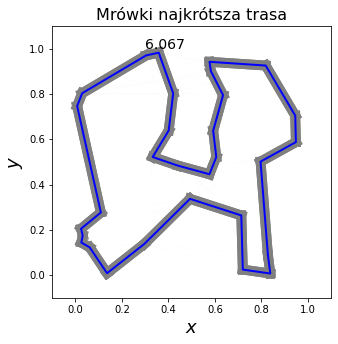

In [13]:
plo_mro=plt.figure(figsize=(5,5))
plt.title("Mrówki najkrótsza trasa",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

# grafika ilustrujaca gęstość feromonów poprzez grubość linii
for i in range(n):
    for j in range(n):
        plt.plot([cities[i,0],cities[j,0]],[cities[i,1],cities[j,1]],
                 c="gray",linewidth=20*fero[i,j]) # grubosć linii prop. do gestości feromonów

bb=np.array([cities[i] for i in best_route])
plt.plot(bb[:,0],bb[:,1],c='blue',linewidth=2)

plt.scatter(cities[:,0],cities[:,1],c='red', s=30)

#for i in range(n):
   # plt.annotate(i, (cities[i,0], cities[i,1]),fontsize=10)

mm=np.round(min_l,3)
plt.annotate(mm, (.3,1),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

## Algorytm genetyczny (AG) 

In [74]:
n

30

In [71]:
start=np.array([random.random(),random.random()]) # startowe
cities=np.array([[random.random(),random.random()] for _ in range(n-1)]) # pośrednie

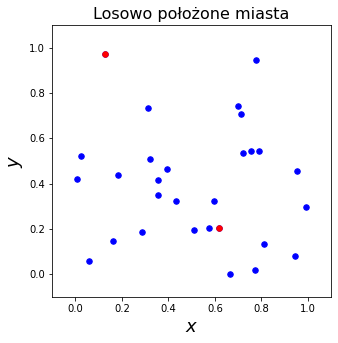

In [84]:
plt.figure(figsize=(5,5))
plt.title("Losowo położone miasta",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.scatter(cities[:,0],cities[:,1],c='blue', s=30)
plt.scatter(cities[0,0],cities[0,1],c='red', s=30)
plt.scatter(cities[1,0],cities[1,1],c='red', s=30)


plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [85]:
# odleglość euklidesowa między miastami pośrednimi i oraz j
def dist(i,j):
    return np.sqrt((cities[i,0]-cities[j,0])**2 + (cities[i,1]-cities[j,1])**2)

 #odległość miasta i od miasta startowego
def dist_s(i):
    return np.sqrt((cities[i,0]-start[0])**2 + (cities[i,1]-start[1])**2)

In [86]:
# tablice odległości między miastami
dtab=np.array([[dist(i,j) for i in range(n-1)] for j in range(n-1)]) # ...pośrednimi
dtab_s=np.array([dist_s(i) for i in range(n-1)]) # ...od miasta startowego

In [87]:
# długość drogi (trochę inaczej zrobione, niż poprzednio)
# path - tablica miast pośrednich

def len_path(path):
    return dtab_s[path[0]]+sum(dtab[path[i],path[i+1]] 
                               for i in range(n-2))+dtab_s[path[n-2]]

In [88]:
# losowa droga
way=np.random.permutation(n-1) 
print(way)

[23  4  3 12 15 14  6 24 20 11  0 17 22  7 19 25 26  8 27 28  2 10 13 21
 16 18  5  1  9]


In [89]:
# długość losowej drogi
len_path(way)

15.342211746456142

## Pokolenie początkowe i selekcja 

In [90]:
# liczba osobników populacji
npop=15

In [91]:
# chromosom/osobnik jako losowa permutacja (ciag miast pośrednich)
def person():
    return np.random.permutation(n-1)  

In [92]:
# początkowe (losowe) pokolenie - tablica osobników
popul=np.array([person() for _ in range(npop)])

In [93]:
# długości dróg dla początkowego pokolenia
popul_len=np.array([len_path(pers) for pers in popul])
print(popul_len)

[15.64119866 14.70484174 15.71263579 16.06854127 14.89762367 17.19367083
 14.79653253 14.44956124 15.88308558 16.25739634 14.6758115  16.28580504
 15.52417997 16.64866892 15.77330928]


In [94]:
# selekcja liczby n_best najlepszych osobników z populacji popu

def select(popu,n_best):
    
    le=len(popu) # liczebność populacji
    popu_len=np.array([len_path(pers) for pers in popu]) # długości dróg 
    
    # sortowanie
    com=np.array([[popu[i], popu_len[i]] for i in range(len(popu_len))],dtype=object)
                               # tablica z dołączonymi długościami dróg
    popu_c=sorted(com, key=lambda x: x[1]) # sortowanie wg długości drogi
    p_c=[x[0] for x in popu_c] # posortowana tablica dróg bez długości
    
    sel=np.array([p_c[0]])     # dodanie najkrótszej drogi do nowej populacji sel
    k=1 # aktualna liczba dróg w populacji sel
    
    for i in range(1,le): # osobnik [0] już dodany, zaczynamy od [1]
        
        if not np.array_equal(p_c[i],sel[-1]): # dodaj tylko innego osobnika
            k=k+1 # aktualna liczba dróg w populacji sel
            sel=np.append(sel,p_c[i]) # dodanie osiobnika do nowej populacji sel
            
        sel=np.reshape(sel,[k,n-1]) # przeformatowanie tablicy zob. poniżej
        if k==n_best: # skończ, jeśli masz już n_best osobników
            break
    return sel    # nowa populacja

In [95]:
def breed(papa, mama): # dwoje rodziców
    cut=random.randint(1,n-2)    # miejsce przecięcia chromosomu 
    chp=np.delete(papa, np.arange(cut, n-1, 1))
    chm=np.delete(mama, np.arange(0,cut, 1))
    if random.random() > 0.5: # odwrócenie kolejności genów matki z prawdopodobieństwem 1/2
        chm=np.flip(chm)
    child=np.concatenate((chp,chm),axis=0) # dziecko
    repeated=np.intersect1d(chp,chm) # powtórzone allele
    missed=np.setdiff1d(papa, child) # brakujące allele
    random.shuffle(missed) # potasowanie brakujących alleli
    for i in range(len(repeated)): # pętla po liczbie powtórzonych alleli
        icor=np.where(child==repeated[i])[0] # położenie powtórzonego allelu
        child[random.choice(icor)]=missed[i] # zastąpienie go przez brakujacy allel
        
    for _ in range(nummut): # mutacje, powtórz nummut razy
        if random.random()<mut: # przestaw z prawdopodobieństwem mut parę losowych miast
            swap(child, random.randint(0,n-2),random.randint(0,n-2))
    return child # dziecko

In [96]:
# wekreowanie nowego pokolenia

def generation():

    children=np.array([breed(popul[random.randint(0,npop-1)],\
                             popul[random.randint(0,npop-1)]) for _ in range(nchil)]) 
                              # spłodzenie dzieci
    
    al=np.concatenate((popul,children)) # dodanie dzieci do populacji rodziców
    
    return select(al,npop)  # selekcja npop najlepszych osobników z połączonej populacji

In [97]:
# mutacja: zamiana miejscami dwóch genów
def swap(list, p1, p2): 
    list[p1], list[p2] = list[p2], list[p1] 
    return list

In [98]:
# parametry i inicjalizacja jeszcze raz

npop=3*n     # liczba osobników w populacji
nchil=3*npop # liczba dzieci
mut=.4       # prawdopodobieństwo mutacji
nummut=n//10 # liczba mutacji

# losowa populacja początkowa
popul=np.array([person() for _ in range(npop)])

### Cały algorytm genetyczny dla TSP 

In [99]:
# można zrobić kilka iteracji tej komórki

for _ in range(500):
    popul=generation()

print('zakres długości: ',len_path(popul[0]),' - ',len_path(popul[npop-1]))
#print(np.array([len_path(pers) for pers in popul]))

tmin=popul[0]
# print(tmin)

tourmin=np.array([cities[i] for i in tmin])
tourmin=np.reshape(np.append(np.insert(tourmin,0,start),start),[n+1,2])
# print(tourmin)

zakres długości:  5.409142671561591  -  5.519602445889696


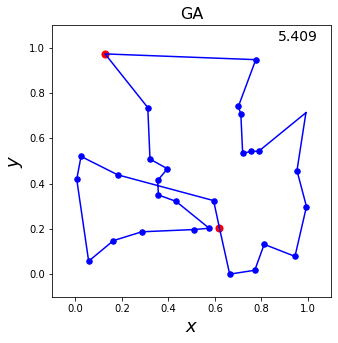

In [105]:
plo_ga=plt.figure(figsize=(5,5))
plt.title("GA",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.plot(tourmin[:,0],tourmin[:,1],c='blue')

plt.scatter(cities[:,0],cities[:,1],c='blue', s=30)
plt.scatter(cities[0,0],cities[0,1],c='red', s=50)
plt.scatter(cities[1,0],cities[1,1],c='red', s=50)


lenpa=np.round(len_path(tmin),3)

plt.annotate(lenpa, (.87,1.03),fontsize=14)


plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

## Algorytm pszczeli 

In [59]:
#pip install pybees

In [60]:
import pybees as pb

ModuleNotFoundError: ignored

In [ ]:
sbc = pb.SimpleBeesContinuous(
    n_scout_bees = 50, # Liczba pszczół zwiadowczych do wykorzystania. Ten parametr służy do inicjalizacji populacji pszczół poszukiwawczych na początku algorytmu.
    elite_site_params = (15, 40),  #„n_params” to całkowita liczba parametrów, które należy wziąć pod uwagę dla prostego algorytmu ciągłego, tablica zawiera liczbę „elitarnych witryn”odpowiednio „żerujące pszczoły”. Kolejność parametrów jest krytyczna.
    best_site_params = (15, 30), #„n_params” to całkowita liczba parametrów, które należy wziąć pod uwagę dla prostego algorytmu ciągłego, tablica zawiera liczbę „najlepszych witryn”odpowiednio „żerujące pszczoły”. Kolejność parametrów jest krytyczna.
    bounds = (-10,10),  #granica
    n_dim = 2, # Liczba wymiarów do rozważenia podczas optymalizacji danej funkcji.„n_dim” musi być większe niż 0. Na przykład, jeśli „n_dim” wynosi 2, toalgorytm bierze pod uwagę 2 wymiary (tj. xiy) i optymalizujete zmienne dla trzeciego wymiaru (tj. z).
    nbhd_radius = 2 #Promień wyszukiwania okolicy. Definiuje lokalną hiperprzestrzeń wyszukiwaniadla elitarnych i najlepszych witryn. Jeśli parametr „strict_bounds” ma wartość True,pszczoły mogą wyszukiwać w tym promieniu tylko wtedy, gdy niezłamać górną / dolną granicę. Jeśli parametr „strict_bounds” ma wartość False wtedy pszczoły mogą szukać poza górną / dolną granicą.
)

In [ ]:
sbd = pb.SimpleBeesDiscrete(
    n_scout_bees = 50, 
    elite_site_params = (15, 40), 
    best_site_params = (15, 30), 
    coordinates = cities)

In [ ]:
sbc.optimize(pb.levy)

In [ ]:
sbd.optimize(pb.tour_distance,n_iter=500)


In [ ]:
sbd.plot()

# puść animację